In [1]:
using CSV, Plots, DataFrames, Measurements, LsqFit, Roots

# Auslesen der Daten

In [2]:
data = CSV.read("data/Ortsauflösung.csv", DataFrame)
D_dist = 0.8 #Fehler der Distanz

dists = measurement.(data[:,1], D_dist)
c_per_mins = measurement.(data[:,2], data[:,3])

25-element Vector{Measurement{Float64}}:
 1571.0 ± 39.0
 1325.0 ± 36.0
  780.0 ± 27.0
  427.0 ± 20.0
  300.0 ± 17.0
  264.0 ± 16.0
  288.0 ± 16.0
  311.0 ± 17.0
  248.0 ± 15.0
  276.0 ± 16.0
        ⋮
  307.0 ± 17.0
  283.0 ± 16.0
  265.0 ± 16.0
  261.0 ± 16.0
  231.0 ± 15.0
  203.0 ± 14.0
  229.0 ± 15.0
  129.0 ± 11.0
   88.0 ± 9.0

# Plotten der Ergebnisse - Fitten der Kurve

Fit-Parameter: [1281.7421585331008, 0.3197180377657868, 1.3262745820068236, 231.03508813589804]
A = measurement(fit.param[1], param_errors[1]) = 1282.0 ± 63.0
mu = measurement(fit.param[2], param_errors[2]) = 0.32 ± 0.073
sigma = measurement(fit.param[3], param_errors[3]) = 1.326 ± 0.078
b = measurement(fit.param[4], param_errors[4]) = 231.0 ± 18.0
FWHM: 3.12 ± 0.18


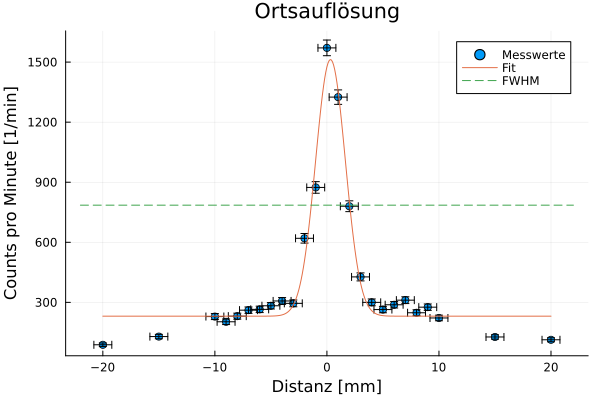

In [3]:
# Definiere die Fit-Funktion
fit_model(x, p) = @. p[1] * exp(-1/2 * ((x - p[2]) / p[3])^2) + p[4]

# Extrahiere die Werte aus den Messungen
x_data = [dists[i].val for i in 1:length(dists)]
y_data = [c_per_mins[i].val for i in 1:length(c_per_mins)]

# Initiale Schätzungen für die Parameter A, mu, sigma, b
p0 = [2000.0, 0.0, 2.0, 200.0]  # Erhöhe den Wert für A

# Führe den Fit durch
fit = curve_fit(fit_model, x_data, y_data, p0)

# Berechne die Unsicherheiten der Fit-Parameter
param_errors = standard_errors(fit)

# Zeige die Fit-Parameter an 
println("Fit-Parameter: ", fit.param)

# Plotte die Daten zusammen mit dem Fit und der Halbwertsbreite
fig = plot(
    dists, c_per_mins,
    seriestype="scatter",
    label="Messwerte",
    xlabel="Distanz [mm]",
    ylabel="Counts pro Minute [1/min]",
    title="Ortsauflösung"
)

plot!(
    x -> fit_model(x, fit.param),
    minimum(x_data):0.1:maximum(x_data),
    label="Fit"
)

#Finde und Plotte FWHM
FWHM = measurement(2 * sqrt(2 * log(2)) * fit.param[3], 2 * sqrt(2 * log(2)) * param_errors[3])
c_per_min_max_half = maximum(y_data) / 2

plot!(
    [-22.0,22.0], [c_per_min_max_half,c_per_min_max_half],
    label="FWHM",
    line=:dash
)

@show A = measurement(fit.param[1], param_errors[1])
@show mu = measurement(fit.param[2], param_errors[2])
@show sigma = measurement(fit.param[3], param_errors[3])
@show b = measurement(fit.param[4], param_errors[4])


println("FWHM: ", FWHM)

savefig("plots/Ortsauflösung.png")

display(fig)

In [4]:
# Erstelle ein DataFrame mit Beispieldaten
df = DataFrame(FWHM = FWHM)

# Schreibe das DataFrame in eine CSV-Datei
CSV.write("output.csv", df)

"output.csv"